# Visualize Convolutions (filters) in CNNs

In this notebook, we train a simple Convolutional Neural Network on the Fashion-MNIST datase and visualize the convolutions graphically

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Build and train a simple CNN

In [4]:

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
val_images=val_images.reshape(10000, 28, 28, 1)
val_images=val_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 20)                3

In [5]:
# find indicies of dresses in the datase
print(np.where(val_labels==3)[0][:20])


#sandals label = 5
#shoes label = 9
#dress label = 3

[ 13  29  32  33  42  67  75  86  91 100 124 159 162 176 182 194 197 215
 259 266]


In [6]:
print(val_labels[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


## Visualize filters

- play around with different Convolution numbers 
- Plotting different items in the dataset (dresses, shoes, sandals, shirts etc.)

1/1 [==============================] - 0s 8ms/step


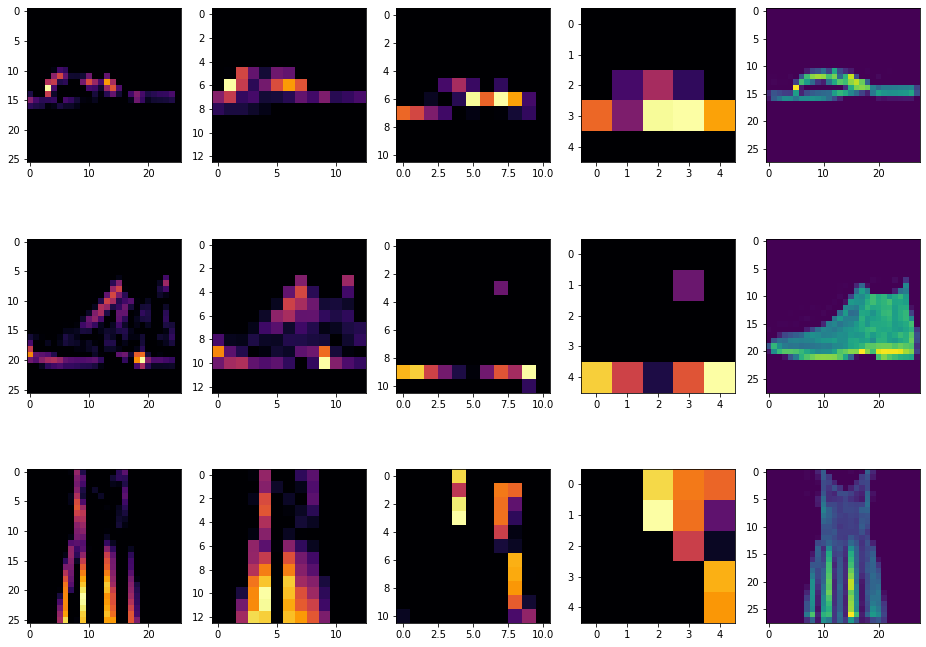

In [11]:
def show_image(img,r,c, ax):
      
    ax[r,c].imshow(val_images[img].reshape(28,28))
    ax[r,c].grid(False)


f, axarr = plt.subplots(3,5, figsize=(16, 12))

# Choose images to visualize filters for and plot 
FIRST_IMAGE=8 #sandals label = 5
SECOND_IMAGE=0 #shoes label = 9
THIRD_IMAGE= 91 #dress label = 3


CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


for x in range(0,4):
    f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)


show_image(FIRST_IMAGE,0,4, axarr)
show_image(SECOND_IMAGE, 1, 4, axarr)
show_image(THIRD_IMAGE, 2, 4, axarr)